In [50]:
# Toggles/Switches
feature_scaling = False
normalization = True

In [51]:
# Imports
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random

In [52]:
# Load Data
(x_train, y_train), \
  (x_test, y_test) = \
  tf.keras.datasets.mnist.load_data()

# Check data shapes
print("train features shape: ", x_train.shape)
print("train labels shape: ", y_train.shape)
print("test set size: ", len(x_test))
print("Min-max values of single pixel: ", (x_train.min(), x_test.max()))


# Print first training example
print(x_train[0][5]) # print a row in image

#? What can we infer from checking the data?
#* Image greyscaling ranges from 0 - 255
#* Image size is 28 * 28 pixels
#* Training set is 60,000 images
#* Testing set is 10,000 images

train features shape:  (60000, 28, 28)
train labels shape:  (60000,)
test set size:  10000
Min-max values of single pixel:  (0, 255)
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]


In [53]:
# Feature Scaling
if feature_scaling:
  x_train, x_test = \
    x_train / x_train.max(), \
    x_test / x_test.max()

# Normalization
if normalization:
  x_train, x_test = \
    (x_train - x_train.mean()) / (x_train.max() - x_train.min()), \
    (x_test - x_test.mean()) / (x_test.max() - x_test.min())

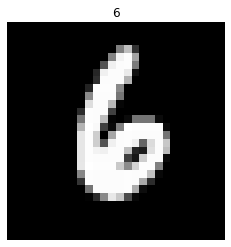

In [54]:
# Visualize Data
index = random.randrange(0, len(x_train))

plt.figure(1)
plt.title(y_train[index])
plt.imshow(x_train[index])
plt.gray()
plt.axis('off')
plt.show()

In [55]:
# TensorFlow solution 1
# Set rand seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  # Flattening the data turns it into a 1D array
  #   Takes the current shape and stacks it (multiply shape)
  #   From (28, 28) -> (, 784)
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4),
  tf.keras.layers.Dense(4),
  tf.keras.layers.Dense(10)
])

# Compile model
model_1.compile(
  # CategoricalCrossentropy must receive one-hot encoded data
  # Hence shape error
  # So instead we'll use SparseCategoricalCrossentropy() which can take in integers
  loss=tf.keras.losses.CategoricalCrossentropy(),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)

# Fit model
non_norm_history = model_1.fit(
  x_train,
  tf.one_hot(y_train, depth=10),
  epochs=10,
  validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 7.9072 - accuracy: 0.1011 - val_loss: 7.0010 - val_accuracy: 0.1141
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 7.4969 - accuracy: 0.1053 - val_loss: 5.2910 - val_accuracy: 0.0996
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 7.8279 - accuracy: 0.0989 - val_loss: 8.2393 - val_accuracy: 0.0978
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 8.2561 - accuracy: 0.1001 - val_loss: 8.1784 - val_accuracy: 0.1011
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 8.4693 - accuracy: 0.1024 - val_loss: 8.1993 - val_accuracy: 0.0994
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 8.9933 - accuracy: 0.1017 - val_loss: 9.0245 - val_accuracy: 0.1004
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 9.0334 - accuracy: 0.1019 - val_loss: 9.0245 - val_accuracy:

In [56]:
# TensorFlow solution 2
# Change: activation function

# Create the model
model_2 = tf.keras.Sequential([
    # Flattening our data turns it into a 1D array
    #   Takes the current shape and stacks it (multiply shape)
    #   In this case (28,28) -> (, 784)
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile model
model_2.compile(
    # CategoricalCrossentropy must receive one-hot encoded data
    # Hence shape error
    # So instead we'll use SparseCategoricalCrossentropy() which can take in integers
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
non_norm_history_2 = model_1.fit(
    x_train,
    tf.one_hot(y_train, depth=10),
    epochs=10,
    validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 9.0334 - accuracy: 0.1019 - val_loss: 9.0245 - val_accuracy: 0.1004
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.0334 - accuracy: 0.1019 - val_loss: 9.0245 - val_accuracy: 0.1004
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 9.0334 - accuracy: 0.1019 - val_loss: 9.0245 - val_accuracy: 0.1004
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.0334 - accuracy: 0.1019 - val_loss: 9.0245 - val_accuracy: 0.1004
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.0334 - accuracy: 0.1019 - val_loss: 9.0245 - val_accuracy: 0.1004
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 9.0334 - accuracy: 0.1019 - val_loss: 9.0245 - val_accuracy: 0.1004
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 9.0334 - accuracy: 0.1019 - val_loss: 9.0245 - val_accuracy:

In [63]:
# TensorFlow solution 3

# set rand seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
history_3 = model_4.fit(
    x_train,
    tf.one_hot(y_train, depth=10),
    epochs=10,
    validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1793 - accuracy: 0.9480 - val_loss: 0.2093 - val_accuracy: 0.9404
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1783 - accuracy: 0.9482 - val_loss: 0.2269 - val_accuracy: 0.9347
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1757 - accuracy: 0.9489 - val_loss: 0.2043 - val_accuracy: 0.9436
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1750 - accuracy: 0.9496 - val_loss: 0.2143 - val_accuracy: 0.9420
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1750 - accuracy: 0.9494 - val_loss: 0.2171 - val_accuracy: 0.9403
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1733 - accuracy: 0.9494 - val_loss: 0.2080 - val_accuracy: 0.9411
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1722 - accuracy: 0.9499 - val_loss: 0.2056 - val_accuracy:

In [64]:
# TensorFlow solution 4

# set rand seed
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_4.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
history_4 = model_4.fit(
    x_train,
    tf.one_hot(y_train, depth=10),
    epochs=10,
    validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5864 - accuracy: 0.8194 - val_loss: 0.3222 - val_accuracy: 0.9047
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3153 - accuracy: 0.9083 - val_loss: 0.2949 - val_accuracy: 0.9167racy
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2819 - accuracy: 0.9184 - val_loss: 0.2690 - val_accuracy: 0.9222
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2622 - accuracy: 0.9243 - val_loss: 0.2580 - val_accuracy: 0.9256
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2467 - accuracy: 0.9286 - val_loss: 0.2483 - val_accuracy: 0.9284
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2343 - accuracy: 0.9317 - val_loss: 0.2387 - val_accuracy: 0.9279
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2250 - accuracy: 0.9339 - val_loss: 0.2261 - val_accur

In [59]:
# TensorFlow solution 5

# set rand seed
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_5.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit model
history_5 = model_4.fit(
    x_train,
    tf.one_hot(y_train, depth=10),
    epochs=10,
    validation_data=(x_test, tf.one_hot(y_test, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2029 - accuracy: 0.9416 - val_loss: 0.2141 - val_accuracy: 0.9378
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1995 - accuracy: 0.9424 - val_loss: 0.2296 - val_accuracy: 0.9339
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1949 - accuracy: 0.9432 - val_loss: 0.2117 - val_accuracy: 0.9406
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1928 - accuracy: 0.9441 - val_loss: 0.2165 - val_accuracy: 0.9412
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1910 - accuracy: 0.9449 - val_loss: 0.2196 - val_accuracy: 0.9395
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1885 - accuracy: 0.9449 - val_loss: 0.2103 - val_accuracy: 0.9416
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1859 - accuracy: 0.9455 - val_loss: 0.2083 - val_accuracy:

In [62]:
# Test model 5
y_probs = model_5.predict(x_test)
y_test[0], y_probs[0]

(7,
 array([0.11273664, 0.1278133 , 0.06095951, 0.11367871, 0.05743667,
        0.17755191, 0.10757847, 0.05365093, 0.09142938, 0.0971645 ],
       dtype=float32))